In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator 
from keras_preprocessing.image import load_img
import matplotlib. pyplot as plt
print(len(tf.config.list_physical_devices('GPU')))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())



1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11514421001023476509
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5748293632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7275675487974118435
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


In [2]:
train_datagen = ImageDataGenerator(
                    rescale = 1/255,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True,
                    vertical_flip = False)
training_set = train_datagen.flow_from_directory("../Dataset/train/",
                                                 target_size = (64, 64),
                                                 class_mode = 'categorical')

Found 11405 images belonging to 6 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1/255)
test_set = test_datagen.flow_from_directory("../Dataset/test/",
                                            target_size = (64, 64),
                                            class_mode = 'categorical')

Found 2629 images belonging to 6 classes.


In [4]:
training_set.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [5]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [6]:
cnn = Sequential()
cnn.add(Convolution2D(filters=32, kernel_size=3, activation='relu', input_shape=(64,64,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Convolution2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(units=256, activation='relu'))
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=6, activation='softmax'))

In [7]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
cnn.fit(training_set, steps_per_epoch= len(training_set), validation_data = test_set, validation_steps=len(test_set), epochs = 15)

Epoch 1/15
357/357 [==============================] - 13s 36ms/step - loss: 0.3893 - accuracy: 0.8598 - val_loss: 0.5501 - val_accuracy: 0.8140
Epoch 2/15
357/357 [==============================] - 13s 35ms/step - loss: 0.3617 - accuracy: 0.8696 - val_loss: 0.7563 - val_accuracy: 0.7452
Epoch 3/15
357/357 [==============================] - 13s 36ms/step - loss: 0.3541 - accuracy: 0.8742 - val_loss: 0.6074 - val_accuracy: 0.7969
Epoch 4/15
357/357 [==============================] - 13s 36ms/step - loss: 0.3353 - accuracy: 0.8794 - val_loss: 0.5320 - val_accuracy: 0.8110
Epoch 5/15
357/357 [==============================] - 13s 36ms/step - loss: 0.3012 - accuracy: 0.8918 - val_loss: 0.5800 - val_accuracy: 0.8201
Epoch 6/15
357/357 [==============================] - 12s 35ms/step - loss: 0.3041 - accuracy: 0.8916 - val_loss: 0.6209 - val_accuracy: 0.8060
Epoch 7/15
357/357 [==============================] - 13s 36ms/step - loss: 0.2710 - accuracy: 0.9000 - val_loss: 0.6333 - val_accuracy:

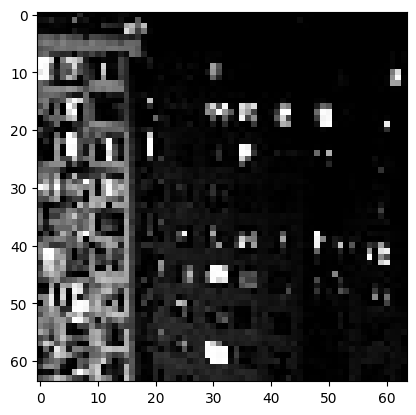

<PIL.Image.Image image mode=RGB size=64x64 at 0x23F6B41FA90>
[[[  2.   2.   2.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[ 13.  13.  13.]
  [ 16.  16.  16.]
  [ 37.  37.  37.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  1.   1.   1.]
  [  1.   1.   1.]
  [  5.   5.   5.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 ...

 [[ 64.  64.  64.]
  [137. 137. 137.]
  [143. 143. 143.]
  ...
  [ 13.  13.  13.]
  [ 12.  12.  12.]
  [  0.   0.   0.]]

 [[  3.   3.   3.]
  [  9.   9.   9.]
  [  4.   4.   4.]
  ...
  [ 12.  12.  12.]
  [  4.   4.   4.]
  [  0.   0.   0.]]

 [[ 79.  79.  79.]
  [103. 103. 103.]
  [129. 129. 129.]
  ...
  [ 15.  15.  15.]
  [  6.   6.   6.]
  [  0.   0.   0.]]]
[[[[  2.   2.   2.]
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   [  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]]

  [[ 13.  13.  13.]
   [ 16.  16.  16.]
   [ 37.  37.  37.]
   ...
   [ 

'buildings'

In [15]:
from keras_preprocessing.image.utils import load_img,img_to_array
import numpy as np
from keras.preprocessing import image
index = ['buildings','forest','glacier','mountain','sea','street']
img = load_img("../Dataset/test/buildings/15331.jpg", target_size=(64,64))
imgplot = plt. imshow(img)
plt. show()
print(img)
x = img_to_array(img)
print(x)
x = np.expand_dims(x,axis=0)
print(x)
pred = np.argmax(cnn.predict(x),axis=1)
pred
index[pred[0]]

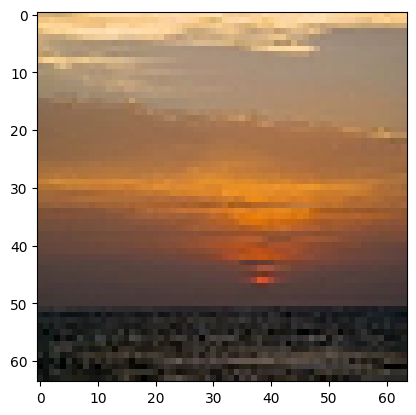

[[[213. 176. 121.]
  [214. 177. 122.]
  [211. 176. 122.]
  ...
  [251. 206. 138.]
  [254. 209. 141.]
  [253. 208. 140.]]

 [[240. 196. 133.]
  [237. 196. 130.]
  [245. 205. 135.]
  ...
  [245. 200. 135.]
  [247. 202. 137.]
  [249. 204. 139.]]

 [[254. 215. 146.]
  [255. 217. 152.]
  [253. 213. 152.]
  ...
  [200. 167. 116.]
  [202. 169. 118.]
  [203. 170. 119.]]

 ...

 [[  0.   4.   3.]
  [ 18.  20.  19.]
  [ 35.  37.  32.]
  ...
  [  4.   0.   0.]
  [  3.   0.   0.]
  [ 11.   8.   3.]]

 [[ 17.  21.  20.]
  [ 12.  14.  13.]
  [ 42.  43.  37.]
  ...
  [ 48.  47.  43.]
  [ 49.  48.  44.]
  [ 52.  51.  47.]]

 [[ 27.  33.  29.]
  [ 13.  15.  14.]
  [ 23.  24.  19.]
  ...
  [ 40.  39.  35.]
  [ 41.  40.  36.]
  [ 40.  39.  35.]]]
[[[[213. 176. 121.]
   [214. 177. 122.]
   [211. 176. 122.]
   ...
   [251. 206. 138.]
   [254. 209. 141.]
   [253. 208. 140.]]

  [[240. 196. 133.]
   [237. 196. 130.]
   [245. 205. 135.]
   ...
   [245. 200. 135.]
   [247. 202. 137.]
   [249. 204. 139.]]

  [[

'sea'

In [16]:
img = load_img('../Dataset/test/sea/14990.jpg', target_size=(64,64))
imgplot = plt. imshow(img)
plt. show()
x = img_to_array(img)
print(x)
x = np.expand_dims(x,axis=0)
print(x)
pred = np.argmax(cnn.predict(x),axis=1)
pred
index[pred[0]]

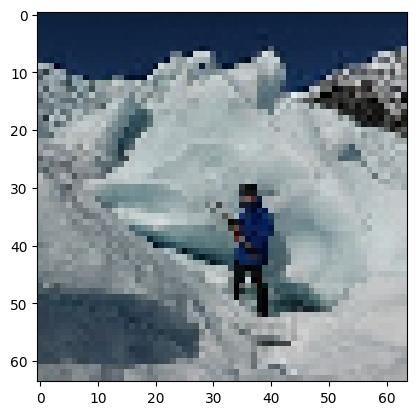

[[[ 13.  33.  58.]
  [ 13.  33.  58.]
  [ 13.  33.  58.]
  ...
  [ 16.  37.  68.]
  [ 16.  37.  68.]
  [ 16.  37.  68.]]

 [[ 14.  34.  61.]
  [ 14.  34.  61.]
  [ 14.  34.  61.]
  ...
  [ 16.  37.  68.]
  [ 16.  37.  68.]
  [ 17.  38.  69.]]

 [[ 15.  35.  62.]
  [ 15.  35.  62.]
  [ 15.  35.  62.]
  ...
  [ 18.  38.  71.]
  [ 18.  38.  73.]
  [ 17.  37.  72.]]

 ...

 [[110. 118. 121.]
  [114. 121. 127.]
  [120. 129. 134.]
  ...
  [160. 161. 163.]
  [160. 161. 163.]
  [163. 164. 166.]]

 [[123. 128. 132.]
  [116. 124. 127.]
  [110. 119. 124.]
  ...
  [159. 160. 162.]
  [163. 164. 166.]
  [166. 167. 169.]]

 [[121. 126. 130.]
  [108. 116. 119.]
  [113. 122. 127.]
  ...
  [168. 169. 171.]
  [170. 171. 173.]
  [171. 172. 174.]]]
[[[[ 13.  33.  58.]
   [ 13.  33.  58.]
   [ 13.  33.  58.]
   ...
   [ 16.  37.  68.]
   [ 16.  37.  68.]
   [ 16.  37.  68.]]

  [[ 14.  34.  61.]
   [ 14.  34.  61.]
   [ 14.  34.  61.]
   ...
   [ 16.  37.  68.]
   [ 16.  37.  68.]
   [ 17.  38.  69.]]

  [[

'glacier'

In [17]:
img = load_img('../Dataset/test/glacier/13251.jpg', target_size=(64,64))
imgplot = plt. imshow(img)
plt. show()
x1 = img_to_array(img)
print(x1)
x1 = np.expand_dims(x1,axis=0)
print(x1)
pred1 = np.argmax(cnn.predict(x1),axis=1)
pred1
index[pred1[0]]


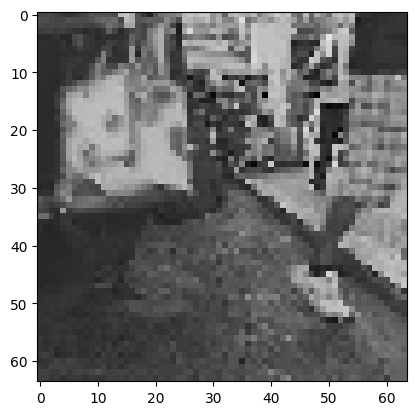

[[[ 71.  71.  71.]
  [ 74.  74.  74.]
  [ 71.  71.  71.]
  ...
  [ 49.  49.  49.]
  [ 52.  52.  52.]
  [ 53.  53.  53.]]

 [[ 78.  78.  78.]
  [ 78.  78.  78.]
  [ 70.  70.  70.]
  ...
  [ 51.  51.  51.]
  [ 53.  53.  53.]
  [ 53.  53.  53.]]

 [[ 74.  74.  74.]
  [ 69.  69.  69.]
  [ 71.  71.  71.]
  ...
  [ 52.  52.  52.]
  [ 53.  53.  53.]
  [ 52.  52.  52.]]

 ...

 [[ 56.  56.  56.]
  [ 55.  55.  55.]
  [ 66.  66.  66.]
  ...
  [ 97.  97.  97.]
  [100. 100. 100.]
  [ 99.  99.  99.]]

 [[ 66.  66.  66.]
  [ 66.  66.  66.]
  [ 56.  56.  56.]
  ...
  [ 93.  93.  93.]
  [ 97.  97.  97.]
  [ 99.  99.  99.]]

 [[ 65.  65.  65.]
  [ 64.  64.  64.]
  [ 54.  54.  54.]
  ...
  [101. 101. 101.]
  [ 98.  98.  98.]
  [100. 100. 100.]]]
[[[[ 71.  71.  71.]
   [ 74.  74.  74.]
   [ 71.  71.  71.]
   ...
   [ 49.  49.  49.]
   [ 52.  52.  52.]
   [ 53.  53.  53.]]

  [[ 78.  78.  78.]
   [ 78.  78.  78.]
   [ 70.  70.  70.]
   ...
   [ 51.  51.  51.]
   [ 53.  53.  53.]
   [ 53.  53.  53.]]

  [[

'street'

In [18]:
img5 = load_img('../Dataset/test/street/12861.jpg', target_size=(64,64))
imgplot = plt. imshow(img5)
plt. show()
x5 = img_to_array(img5)
print(x5)
x5 = np.expand_dims(x5,axis=0)
print(x5)
pred5 = np.argmax(cnn.predict(x5),axis=1)
pred5
index[pred5[0]]

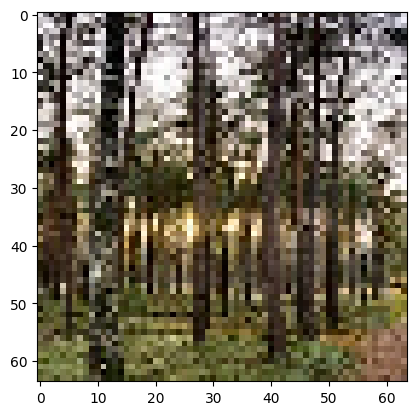

[[[234. 232. 235.]
  [119. 117. 122.]
  [ 23.  18.  24.]
  ...
  [102. 100. 111.]
  [ 91.  91. 101.]
  [218. 218. 226.]]

 [[202. 197. 201.]
  [210. 205. 211.]
  [183. 178. 184.]
  ...
  [139. 137. 150.]
  [211. 211. 223.]
  [241. 239. 250.]]

 [[188. 183. 187.]
  [250. 245. 251.]
  [255. 252. 255.]
  ...
  [137. 135. 146.]
  [209. 207. 220.]
  [175. 173. 184.]]

 ...

 [[137. 144.  92.]
  [127. 131.  81.]
  [135. 143.  94.]
  ...
  [138.  97.  69.]
  [130.  93.  66.]
  [132.  96.  72.]]

 [[ 79.  86.  34.]
  [106. 108.  58.]
  [114. 120.  72.]
  ...
  [133.  94.  65.]
  [152. 115.  89.]
  [111.  77.  52.]]

 [[100. 104.  54.]
  [123. 122.  74.]
  [105. 108.  63.]
  ...
  [151. 115.  93.]
  [142. 106.  90.]
  [116.  84.  71.]]]
[[[[234. 232. 235.]
   [119. 117. 122.]
   [ 23.  18.  24.]
   ...
   [102. 100. 111.]
   [ 91.  91. 101.]
   [218. 218. 226.]]

  [[202. 197. 201.]
   [210. 205. 211.]
   [183. 178. 184.]
   ...
   [139. 137. 150.]
   [211. 211. 223.]
   [241. 239. 250.]]

  [[

'forest'

In [20]:
img6 = load_img('../Dataset/test/forest/12968.jpg', target_size=(64,64))
imgplot = plt. imshow(img6)
plt. show()
x6 = img_to_array(img6)
print(x6)
x6 = np.expand_dims(x6,axis=0)
print(x6)
pred6 = np.argmax(cnn.predict(x6),axis=1)
pred6
index[pred6[0]]